In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from google.colab import drive


In [2]:
data = drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/dataset_DT (1).csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


Pre-process the dataset and provide a detailed explanation. [10 points]

Perform 2 visualizations of the features with respect to target variable with detailed explanation. [10 points]

Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the Six most influential attributes with detailed explanation. [5 points]

Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split. [5 points]

Use comments to explain your code and variable names. [4points]

Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [10 points]

Compare the results of the classifier using gini and entropy [6 points]

Print the decision tree visualization with depth of 5 [6points]

Perform the Random Forest Classifier(RFC) with the same dataset [6]

Evaluate the decision tree model and Random Forest Classifier[6]

Perform and plot the ROC curves for the two classifiers on the same graph[6]

interpret the ROC graph[6]

In [5]:
print(df.columns)
print("Rows = ",df.shape[0])
print("Columns = ",df.shape[1])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Rows =  18423
Columns =  17


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,18423.000000,18423.000000,18117.000000,18423.000000,18423.000000,18423.000000,18423.000000
mean,40.952451,1849.616403,15.252525,411.779569,2.279433,57.421213,0.875970
std,11.458720,3742.556247,8.085925,323.241660,1.981642,112.455326,2.226526
min,18.000000,-3372.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,32.000000,206.000000,8.000000,192.000000,1.000000,-1.000000,0.000000
50%,38.000000,718.000000,15.000000,316.000000,2.000000,-1.000000,0.000000
75%,49.000000,2116.500000,21.000000,533.000000,3.000000,91.000000,1.000000
max,95.000000,102127.000000,31.000000,3881.000000,55.000000,871.000000,58.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [8]:
df.isnull().sum()

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
df["education"].fillna(df["education"].mode()[0], inplace = True)
df["day"].fillna(df["day"].mode()[0], inplace = True)
df["month"].fillna(df["month"].mode()[0], inplace = True)

In [10]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

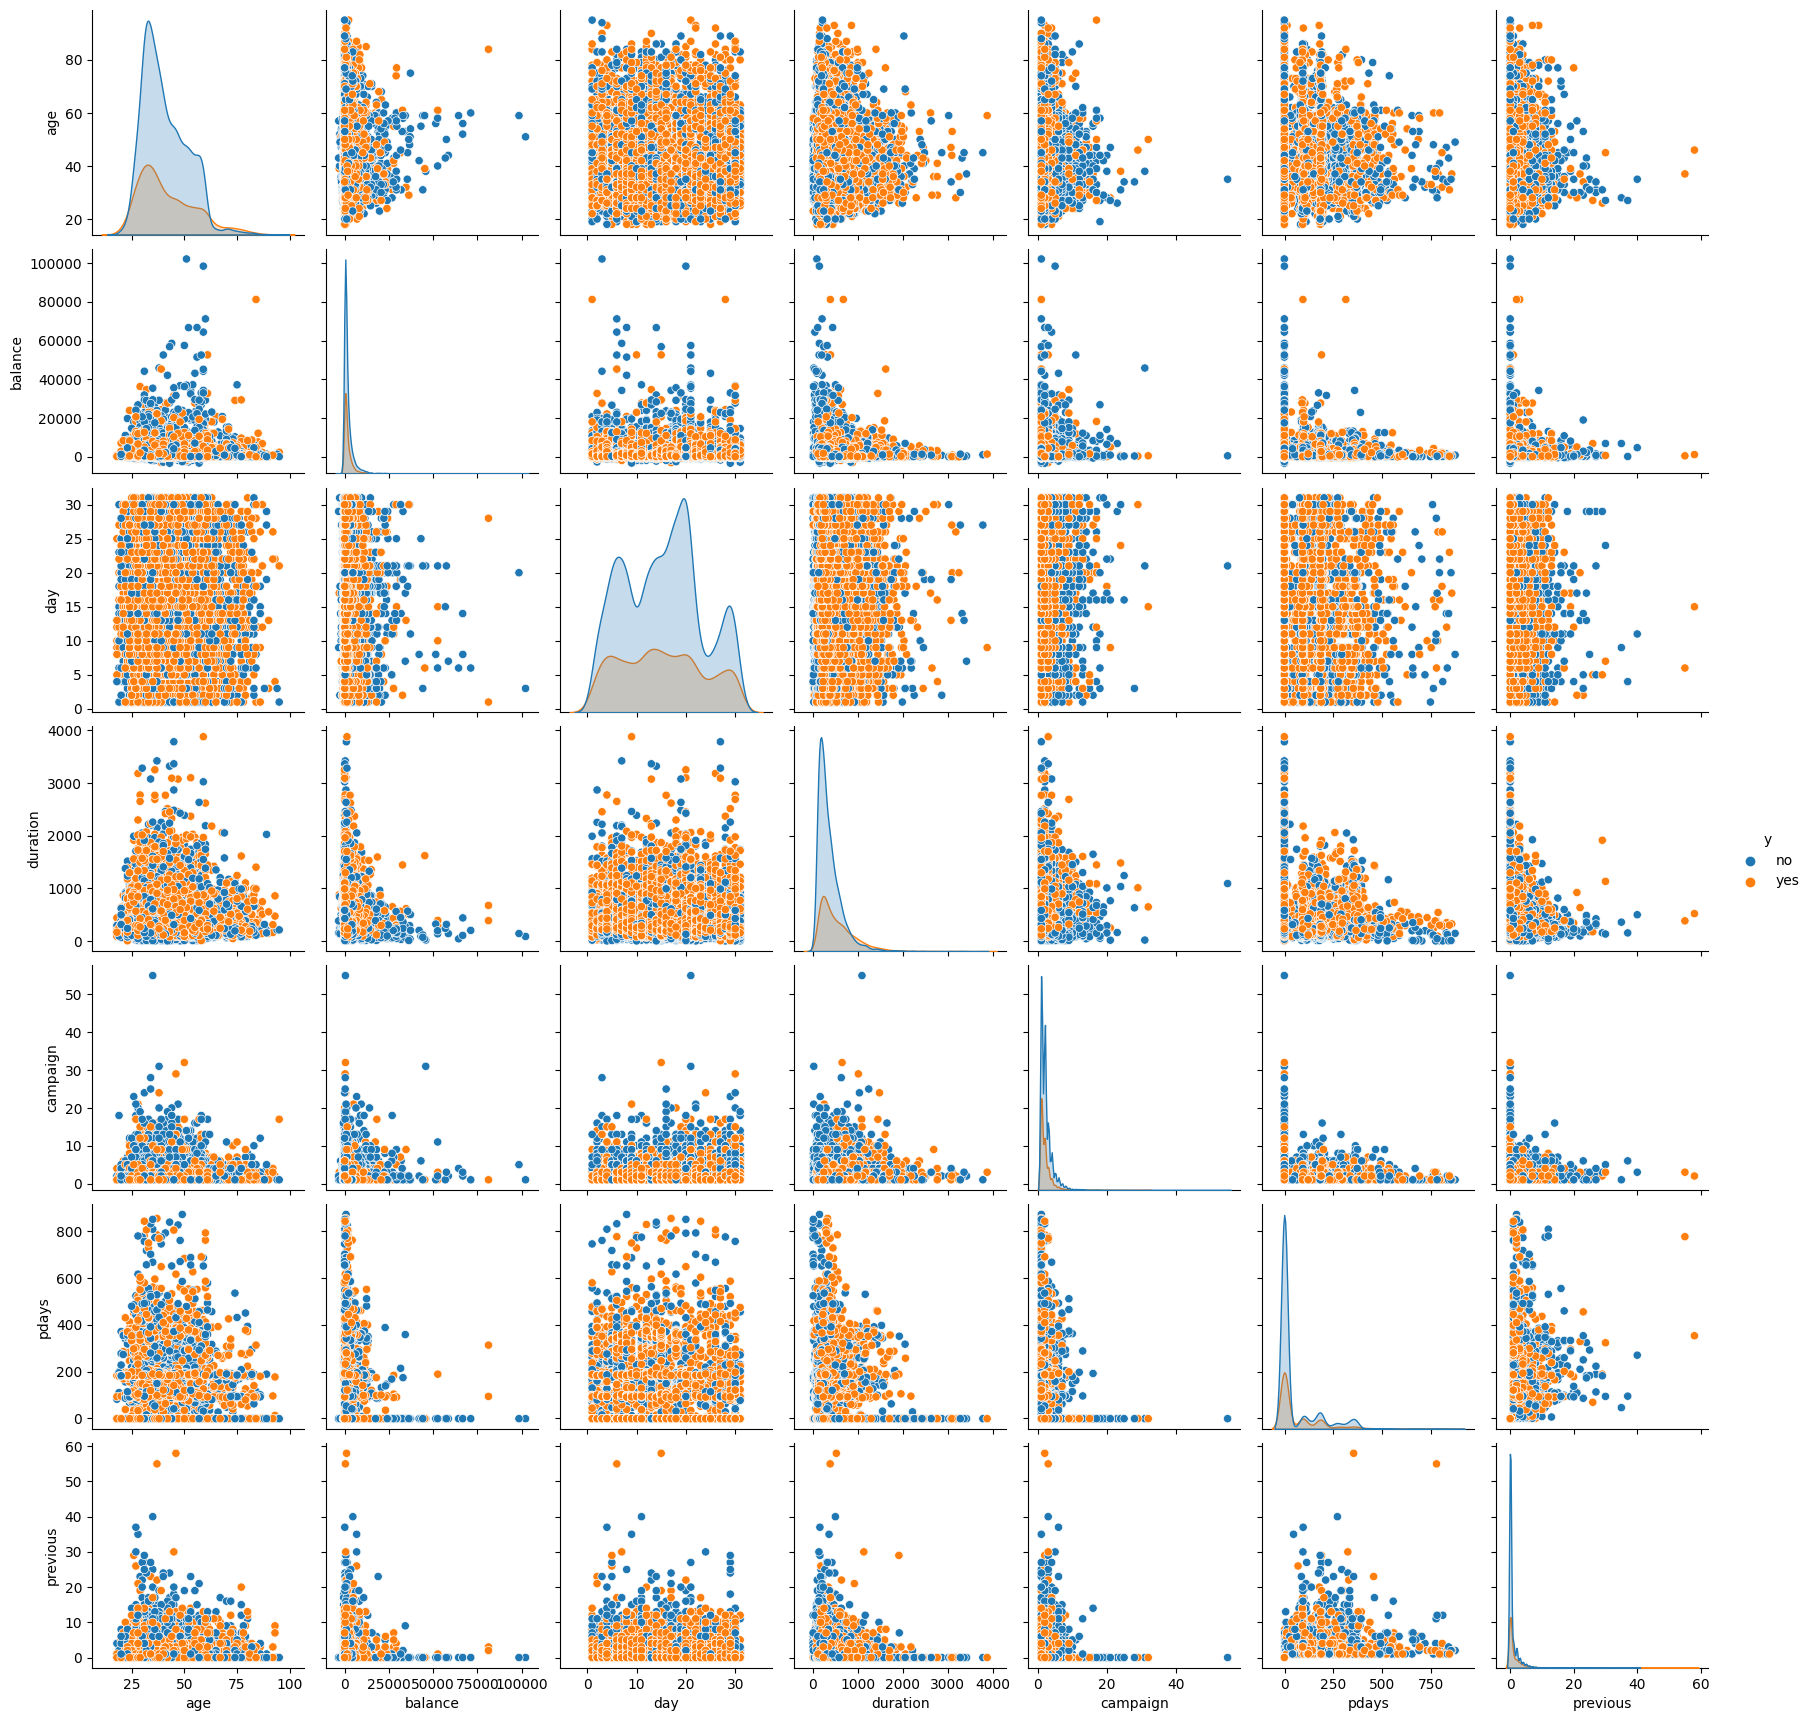

In [11]:
sns.pairplot(data=df, hue="y")

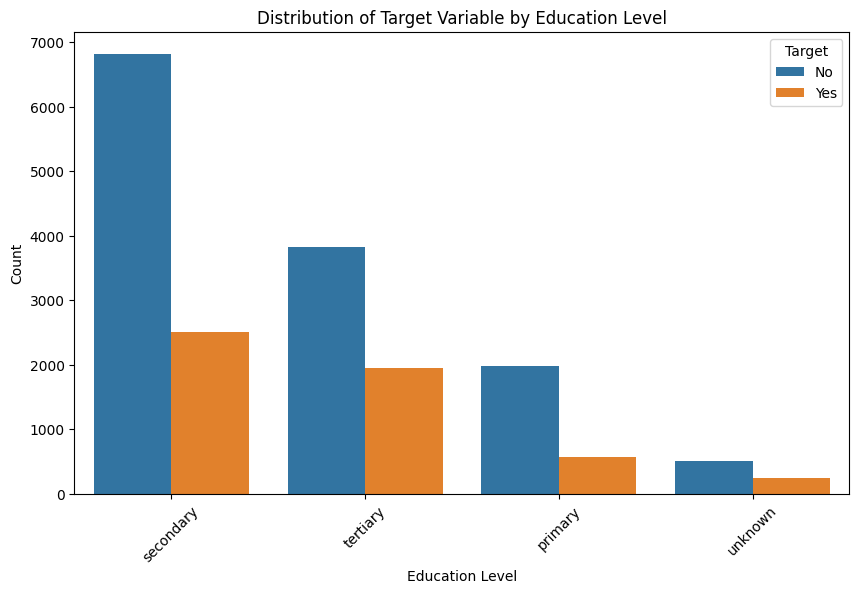

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Distribution of Target Variable by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['No', 'Yes'])
plt.show()

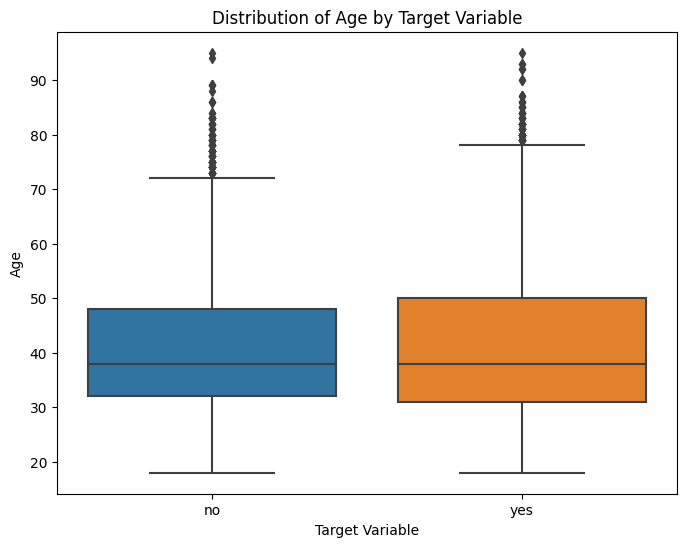

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Distribution of Age by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Age')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['loan'] = le.fit_transform(df['loan'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['housing'] = le.fit_transform(df['housing'])
df['y'] = le.fit_transform(df['y'])

In [16]:
X = df[['age','job','marital','education','default','housing','loan','duration','campaign','pdays','previous','poutcome']]

In [17]:
Y = df[['y']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state = 0)


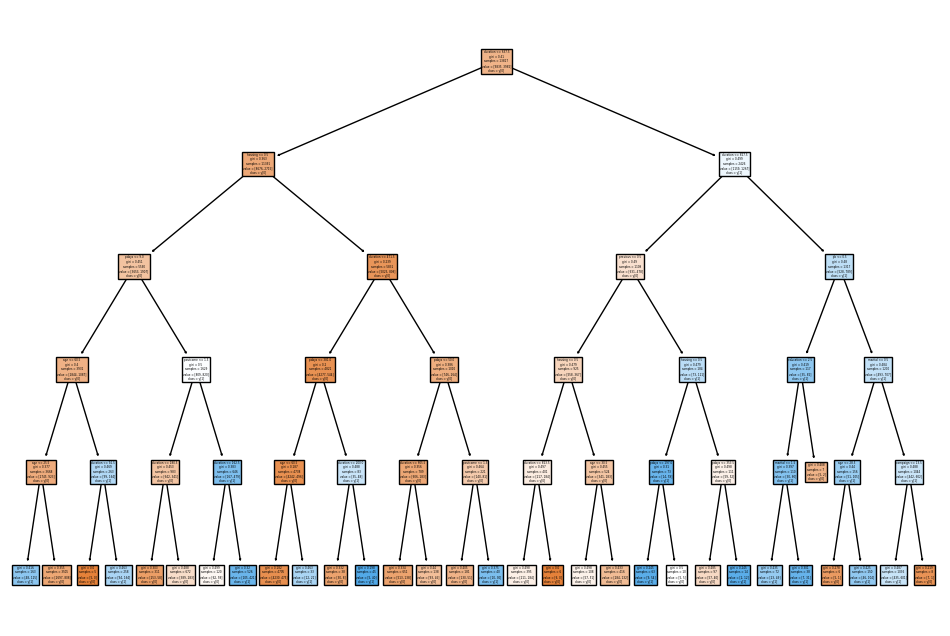

In [19]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=True, max_depth=5)
plt.show()

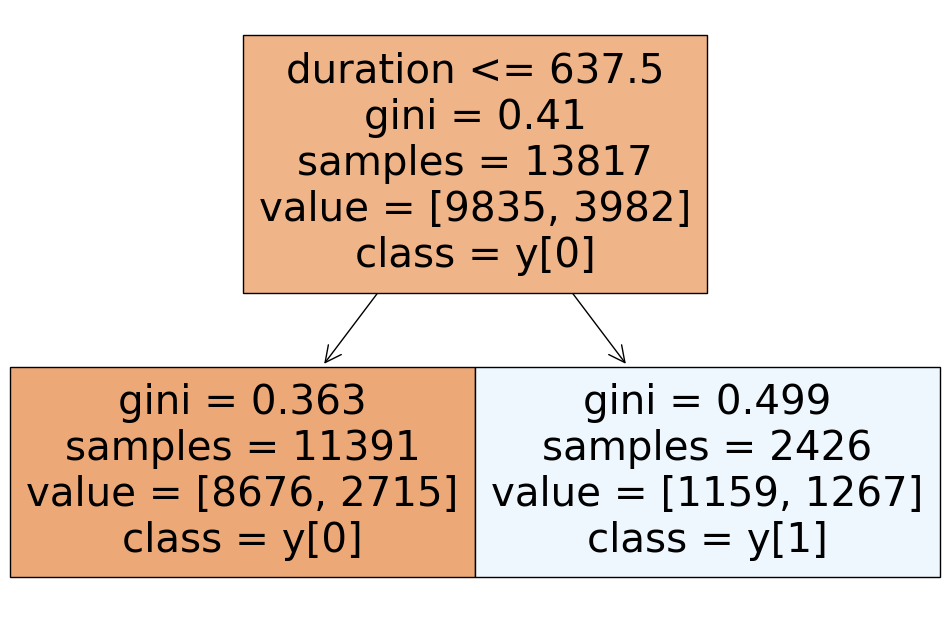

In [30]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_leaf=3, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3, random_state=42)
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=True, max_depth=5)
plt.show()

In [21]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

confusion_gini = confusion_matrix(y_test, y_pred_gini)
report_gini = classification_report(y_test, y_pred_gini, output_dict = True)

confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
report_entropy = classification_report(y_test, y_pred_entropy)
print("Confusion Matrix (Gini):\n", confusion_gini)
print("Classification Report (Gini):\n", report_gini)

print("Confusion Matrix (Entropy):\n", confusion_entropy)
print("Classification Report (Entropy):\n", report_entropy)

Confusion Matrix (Gini):
 [[3006  293]
 [ 784  523]]
Classification Report (Gini):
 {'0': {'precision': 0.7931398416886544, 'recall': 0.9111852076386784, 'f1-score': 0.8480744815911976, 'support': 3299}, '1': {'precision': 0.6409313725490197, 'recall': 0.4001530221882173, 'f1-score': 0.49269901083372586, 'support': 1307}, 'accuracy': 0.7661745549283543, 'macro avg': {'precision': 0.7170356071188371, 'recall': 0.6556691149134478, 'f1-score': 0.6703867462124617, 'support': 4606}, 'weighted avg': {'precision': 0.7499491188997914, 'recall': 0.7661745549283543, 'f1-score': 0.747233026906001, 'support': 4606}}
Confusion Matrix (Entropy):
 [[2987  312]
 [ 778  529]]
Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      3299
           1       0.63      0.40      0.49      1307

    accuracy                           0.76      4606
   macro avg       0.71      0.66      0.67      4606
weighted avg       0.75   

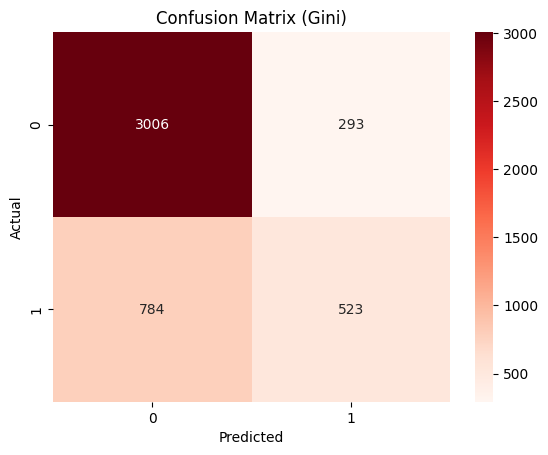

In [22]:
sns.heatmap(confusion_gini, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gini)')
plt.show()

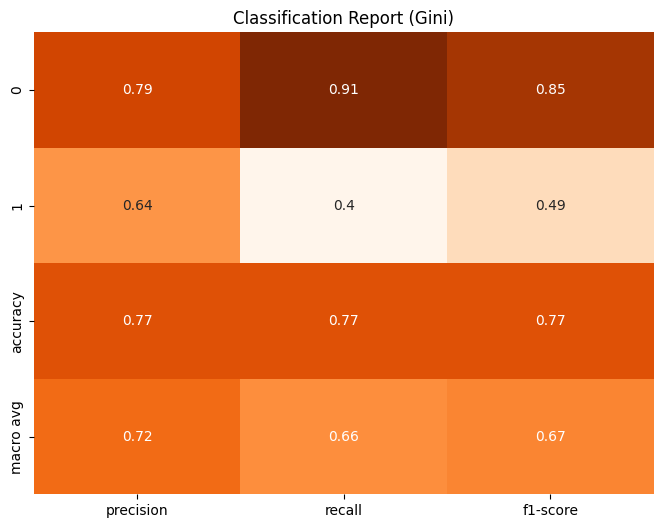

In [23]:
classification_report_df = pd.DataFrame(report_gini).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(classification_report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Oranges', cbar=False)
plt.title('Classification Report (Gini)')
plt.show()

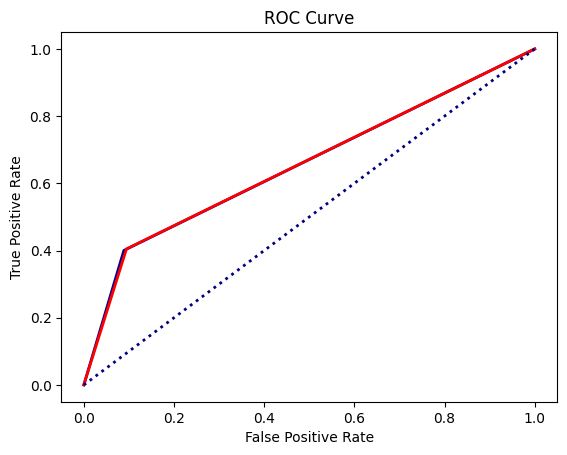

In [26]:
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

roc_auc_gini = auc(fpr_gini, tpr_gini)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure()
plt.plot(fpr_gini, tpr_gini, color='darkblue', lw=2, label='ROC curve (Gini) (area = %0.2f)' % roc_auc_gini)
plt.plot(fpr_entropy, tpr_entropy, color='red', lw=2, label='ROC curve (Entropy) (area = %0.2f)' % roc_auc_entropy)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc, output_dict = True)

print("Confusion Matrix (Random Forest):\n", confusion_rfc)
print("Classification Report (Random Forest):\n", report_rfc)

<ipython-input-27-4cf92866da79>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Confusion Matrix (Random Forest):
 [[2881  418]
 [ 699  608]]
Classification Report (Random Forest):
 {'0': {'precision': 0.8047486033519553, 'recall': 0.8732949378599576, 'f1-score': 0.8376217473469981, 'support': 3299}, '1': {'precision': 0.5925925925925926, 'recall': 0.4651874521805662, 'f1-score': 0.5212173167595371, 'support': 1307}, 'accuracy': 0.757490230134607, 'macro avg': {'precision': 0.6986705979722739, 'recall': 0.6692411950202619, 'f1-score': 0.6794195320532677, 'support': 4606}, 'weighted avg': {'precision': 0.7445471474113371, 'recall': 0.757490230134607, 'f1-score': 0.7478387272041819, 'support': 4606}}


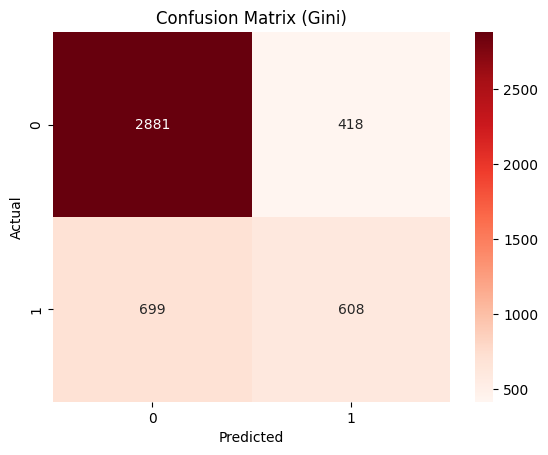

In [28]:
sns.heatmap(confusion_rfc, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gini)')
plt.show()

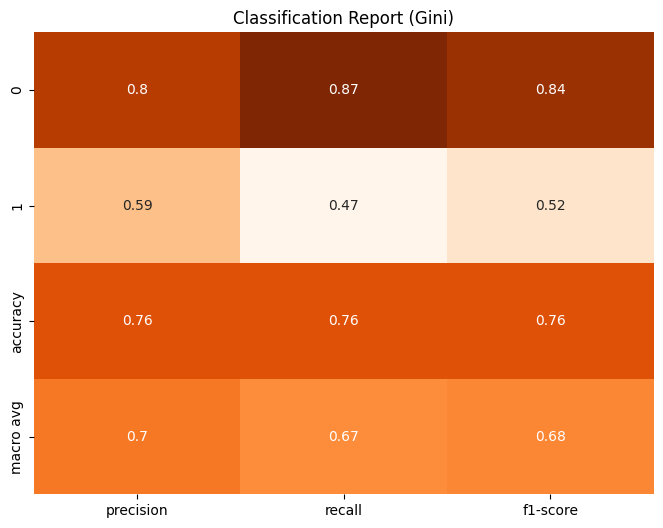

In [29]:
classification_report_df = pd.DataFrame(report_rfc).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(classification_report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Oranges', cbar=False)
plt.title('Classification Report (Gini)')
plt.show()

Top Six Most Influential Attributes:
     Feature  Importance
7   duration    0.319949
0        age    0.158195
9      pdays    0.127477
5    housing    0.123623
11  poutcome    0.110723
8   campaign    0.041096


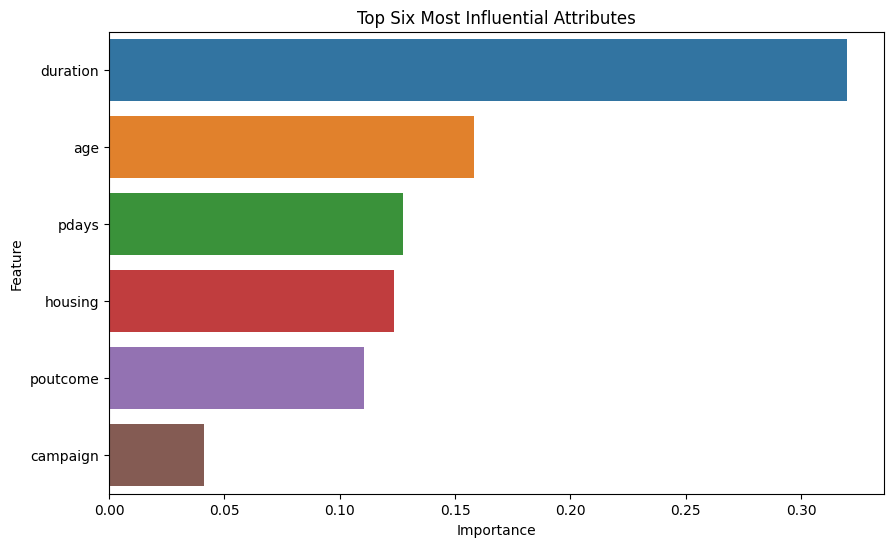

In [31]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_six_attributes = importance_df.head(6)
print("Top Six Most Influential Attributes:")
print(top_six_attributes)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_six_attributes)
plt.title('Top Six Most Influential Attributes')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
